In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anthem-lyrics/af-06_english.txt
/kaggle/input/anthem-lyrics/at-38_english.txt
/kaggle/input/anthem-lyrics/br_english.txt
/kaggle/input/anthem-lyrics/csk_english.txt
/kaggle/input/anthem-lyrics/fr_english.txt
/kaggle/input/anthem-lyrics/at_english.txt
/kaggle/input/anthem-lyrics/af-tal_english.txt
/kaggle/input/anthem-lyrics/do_english.txt
/kaggle/input/anthem-lyrics/cis_english.txt
/kaggle/input/anthem-lyrics/ge-ssr_english.txt
/kaggle/input/anthem-lyrics/cv_english.txt
/kaggle/input/anthem-lyrics/bf_english.txt
/kaggle/input/anthem-lyrics/asy_english.txt
/kaggle/input/anthem-lyrics/er_english.txt
/kaggle/input/anthem-lyrics/ga_english.txt
/kaggle/input/anthem-lyrics/che-04_english.txt
/kaggle/input/anthem-lyrics/cn-16_english.txt
/kaggle/input/anthem-lyrics/bo_english.txt
/kaggle/input/anthem-lyrics/kh-75_english.txt
/kaggle/input/anthem-lyrics/cz_english.txt
/kaggle/input/anthem-lyrics/af-78_english.txt
/kaggle/input/anthem-lyrics/cw_english.txt
/kaggle/input/anthem-lyr

## Textual analysis

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


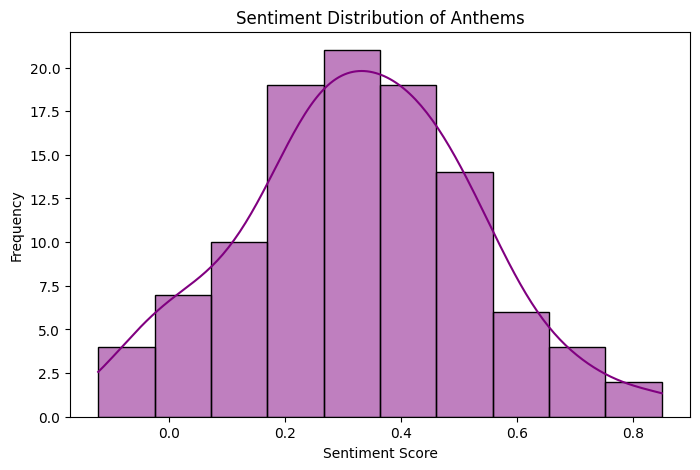


📊 Average Sentiment Score: 0.329


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


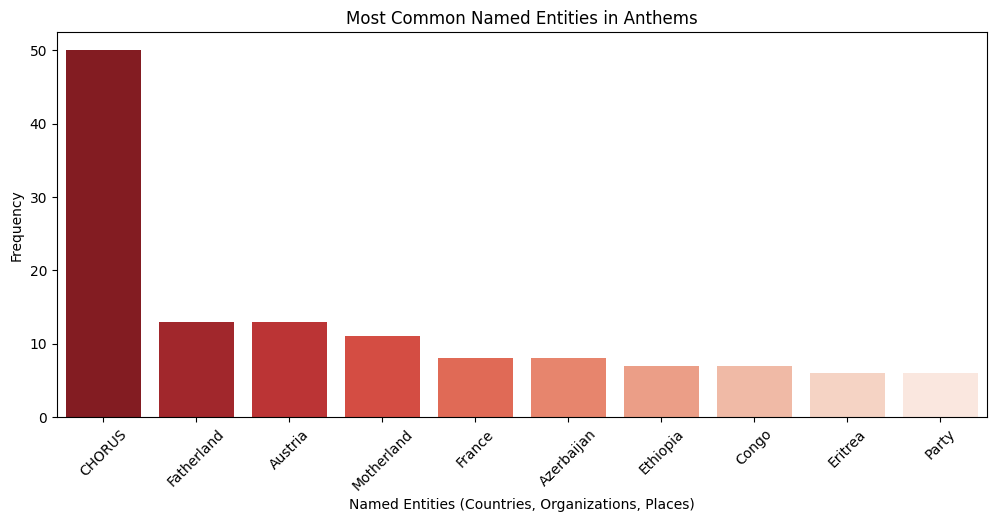


🌎 **Most Common Named Entities (Countries, Places, Orgs)** 🌎
['CHORUS', 'Fatherland', 'Austria', 'Motherland', 'France', 'Azerbaijan', 'Ethiopia', 'Congo', 'Eritrea', 'Party']


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


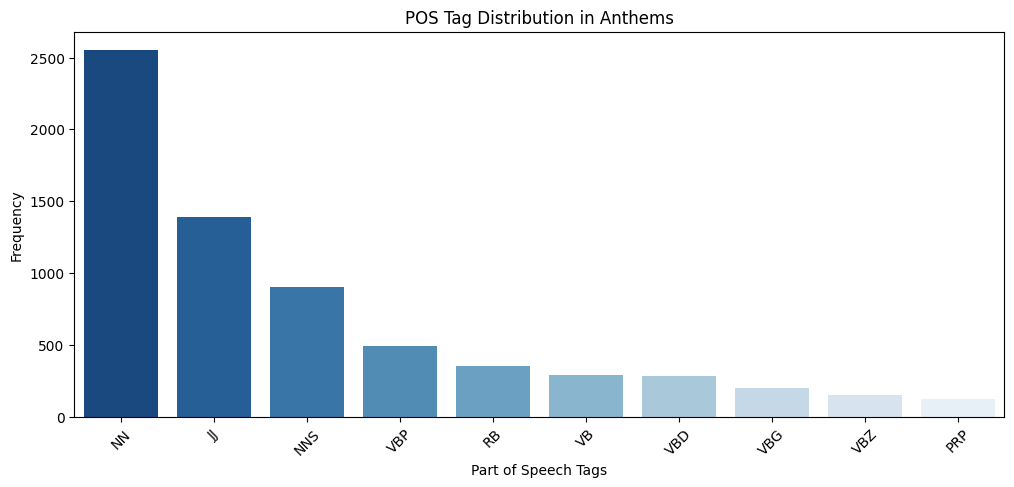


📖 **Most Common POS Tags in Anthems** 📖
[('NN', 2552), ('JJ', 1388), ('NNS', 904), ('VBP', 490), ('RB', 355), ('VB', 288), ('VBD', 280), ('VBG', 197), ('VBZ', 151), ('PRP', 126)]

📜 **Extended Text Analysis Summary** 📜
Total Anthem Translations Processed: 106
Total Unique Words: 2407
Average Sentiment Score: 0.329
Most Common Named Entities: ['CHORUS', 'Fatherland', 'Austria', 'Motherland', 'France', 'Azerbaijan', 'Ethiopia', 'Congo', 'Eritrea', 'Party']
Most Common POS Tags: [('NN', 2552), ('JJ', 1388), ('NNS', 904), ('VBP', 490), ('RB', 355), ('VB', 288), ('VBD', 280), ('VBG', 197), ('VBZ', 151), ('PRP', 126)]


In [3]:
import os
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import spacy

# Ensure necessary downloads
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nlp = spacy.load("en_core_web_sm")  # Load SpaCy English model

# Define Paths
TEXT_FOLDER = "/kaggle/input/anthem-lyrics"
OUTPUT_FOLDER = "text_analysis_results/"
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# Stopwords & Punctuation
stop_words = set(stopwords.words("english"))
translator = str.maketrans('', '', string.punctuation)

# Function to clean text
def clean_text(text):
    text = text.lower()
    text = text.translate(translator)  # Remove punctuation
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words and word.isalpha()]
    return " ".join(words)

# Load and clean all anthem translations
anthem_texts = []
original_texts = []  # Store original text for better sentence-level analysis
for file in os.listdir(TEXT_FOLDER):
    if file.endswith(".txt"):
        with open(os.path.join(TEXT_FOLDER, file), "r", encoding="utf-8") as f:
            text = f.read()
            original_texts.append(text)  # Store original text
            cleaned_text = clean_text(text)
            anthem_texts.append(cleaned_text)

# Combine all texts
full_corpus = " ".join(anthem_texts)

### (A) SENTIMENT ANALYSIS ###
sentiments = []
for text in original_texts:
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity  # -1 (negative) to +1 (positive)
    sentiments.append(sentiment_score)

# Plot Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.histplot(sentiments, bins=10, kde=True, color="purple")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Sentiment Distribution of Anthems")
plt.savefig(f"{OUTPUT_FOLDER}sentiment_distribution.png")
plt.show()

# Compute Average Sentiment
avg_sentiment = np.mean(sentiments)
print(f"\n📊 Average Sentiment Score: {avg_sentiment:.3f}")

### (B) NAMED ENTITY RECOGNITION (NER) ###
all_named_entities = []
for text in original_texts:
    doc = nlp(text)
    named_entities = [ent.text for ent in doc.ents if ent.label_ in ["GPE", "ORG", "LOC"]]
    all_named_entities.extend(named_entities)

# Count Most Common Named Entities
entity_counts = Counter(all_named_entities)
top_entities = entity_counts.most_common(10)

# Plot Named Entities
plt.figure(figsize=(12, 5))
sns.barplot(x=[e[0] for e in top_entities], y=[e[1] for e in top_entities], palette="Reds_r")
plt.xticks(rotation=45)
plt.xlabel("Named Entities (Countries, Organizations, Places)")
plt.ylabel("Frequency")
plt.title("Most Common Named Entities in Anthems")
plt.savefig(f"{OUTPUT_FOLDER}named_entities.png")
plt.show()

print("\n🌎 **Most Common Named Entities (Countries, Places, Orgs)** 🌎")
print([e[0] for e in top_entities])

### (C) PART-OF-SPEECH (POS) TAGGING ###
all_pos_tags = []
for text in anthem_texts:
    words = word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    pos_only = [pos[1] for pos in pos_tags]  # Extract only POS tags
    all_pos_tags.extend(pos_only)

# Count Most Common POS Tags
pos_counts = Counter(all_pos_tags)
top_pos = pos_counts.most_common(10)

# Plot POS Tags
plt.figure(figsize=(12, 5))
sns.barplot(x=[p[0] for p in top_pos], y=[p[1] for p in top_pos], palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("Part of Speech Tags")
plt.ylabel("Frequency")
plt.title("POS Tag Distribution in Anthems")
plt.savefig(f"{OUTPUT_FOLDER}pos_tags.png")
plt.show()

print("\n📖 **Most Common POS Tags in Anthems** 📖")
print(top_pos)

### (D) PRINT FINAL SUMMARY ###
print("\n📜 **Extended Text Analysis Summary** 📜")
print(f"Total Anthem Translations Processed: {len(anthem_texts)}")
print(f"Total Unique Words: {len(set(full_corpus.split()))}")
print(f"Average Sentiment Score: {avg_sentiment:.3f}")
print(f"Most Common Named Entities: {[e[0] for e in top_entities]}")
print(f"Most Common POS Tags: {top_pos}")
